# Part 2: Spatial Interaction models

## III.1 Models and calibration

In [80]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import random
import pandas as pd
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
from math import sqrt

In [81]:
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

In [82]:
def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [83]:
#read in your London Commuting Data
cdata = pd.read_csv("https://raw.githubusercontent.com/Hannahzhu1/CASA0002/main/london_flows.csv")

In [84]:
#Take a look
cdata.head(5)

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [85]:
#rename
cdata.rename(columns={"population":"Oi_pop","jobs":"Dj_job","distance":"Dist"},inplace = True)
cdata.head(5)

,station_origin,station_destination,flows,Oi_pop,Dj_job,Dist
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [86]:
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
cdatamat = pd.pivot_table(cdata, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


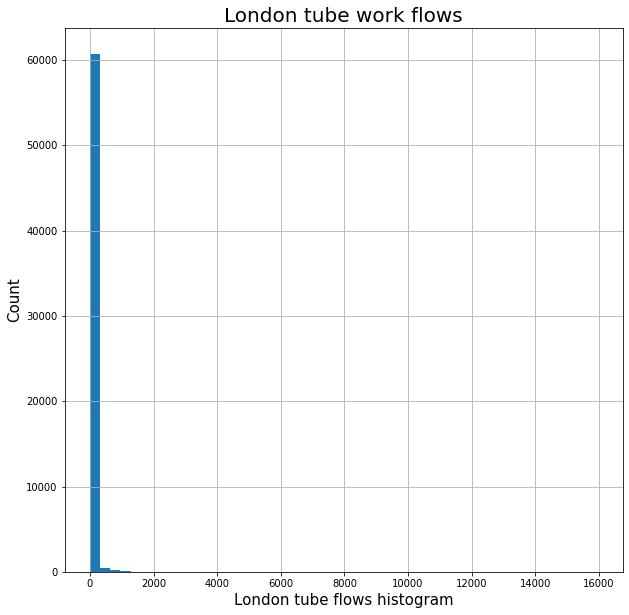

In [87]:
plt.subplots(figsize=(10,10))

plt.hist(cdata["flows"], histtype="stepfilled" , bins = 50)
plt.xlabel("London tube flows histogram", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("London tube work flows", fontsize = 20)
plt.grid(True)

Text(0.5, 0, 'Dist')

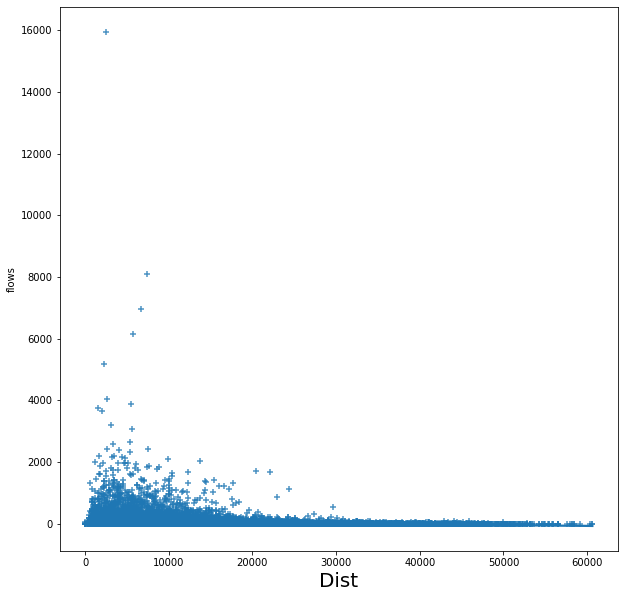

In [88]:
#before taking log
x = cdata["Dist"]
y = cdata["flows"]

#create the subplot
fig, ax = plt.subplots(figsize = (10,10))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("Dist", fontsize = 20)

Text(0, 0.5, 'log(Total flows)')

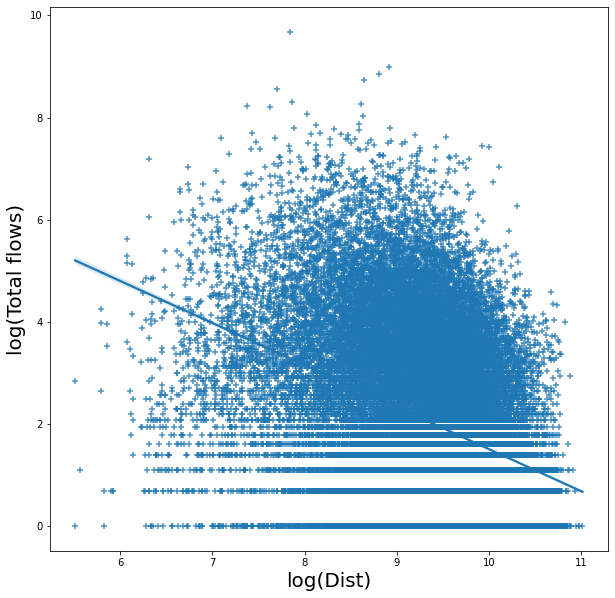

In [89]:
#quiet poissony, there for we decide to log the equation

#subset the dataframe to the flows we want
cdata_flows = cdata[["flows", "Dist"]]
#remove all 0 values (logarithms can't deal with 0 values)
cdata_flows = cdata_flows[(cdata_flows!=0).all(1)]

#extract the x and y converting to log
x = np.log(cdata_flows["Dist"])
y = np.log(cdata_flows["flows"])

#create the subplot
fig, ax = plt.subplots(figsize = (10,10))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("log(Dist)", fontsize = 20)
ax.set_ylabel("log(Total flows)", fontsize = 20)

In [90]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#delete NA value before taking logarithms
cdata = cdata[cdata['Oi_pop']!=0]
cdata = cdata[cdata['Dj_job']!=0]
cdata = cdata[cdata['Dist']!=0]


#take the variables and produce logarithms of them
x_variables = ["Oi_pop", "Dj_job", "Dist"]
log_x_vars = []
for x in x_variables:
    cdata[f"log_{x}"] = np.log(cdata[x])
    log_x_vars.append(f"log_{x}")

In [91]:
cdata.head(5)

,station_origin,station_destination,flows,Oi_pop,Dj_job,Dist,log_Oi_pop,log_Dj_job,log_Dist
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274


### Origin constrained--Inverse law

In [92]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_Dj_job + log_Dist-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=cdata, family=sm.families.Poisson()).fit()

In [93]:
#let's have a look at it's summary
#print(prodSim.summary())

In [94]:
#get the predictions
predictions = prodSim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
cdata["prodSimFitted"] = round(predictions_summary_frame["mean"],0)

In [95]:
#now we can create pivot table to turn paired list into matrix (and compute the margins as well)
cdatamat1 = cdata.pivot_table(values ="prodSimFitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatamat1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [96]:
#now we can create pivot table to turn paired list into matrix (and compute the margins as well)
cdatamat1 = cdata.pivot_table(values ="prodSimFitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatamat1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [97]:
CalcRSqaured(cdata["flows"], cdata["prodSimFitted"])

0.38827639501786243

In [98]:
CalcRMSE(cdata["flows"], cdata["prodSimFitted"])

102.893

### Origin constrained--negative exponential

In [99]:
# Run a doubly constrained SIM with a negative exponential cost function.
prosim_exp_form = "flows ~ station_origin + log_Dj_job + Dist-1"
prodsim_exp = smf.glm(formula=prosim_exp_form, data = cdata, family = sm.families.Poisson()).fit()

print(prodsim_exp.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Mon, 02 May 2022   Deviance:                   1.6477e+06
Time:                        17:38:08   Pearson chi2:                 2.40e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [100]:
#get the predictions
predictions_exp = prodsim_exp.get_prediction()
predictions_exp_summary_frame = predictions_exp.summary_frame()
cdata["prosimest_exp"] = round(predictions_exp_summary_frame["mean"],0)


#here's the matrix
cdatamat2 = cdata.pivot_table(values ="prosimest_exp", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatamat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,595.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3744.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2885.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4867.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3100.0


In [101]:
CalcRSqaured(cdata["flows"],cdata["prosimest_exp"])

0.4680648443542878

In [102]:
CalcRMSE(cdata["flows"],cdata["prosimest_exp"])

96.263

In [103]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdata.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdata = cdata.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdata.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdata = cdata.merge(D_j, on = "station_destination", how = "left" )

In [104]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
cdata = cdata.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
cdata.drop(columns = ["coef"], inplace = True)
#check this has worked
cdata.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,station_origin,station_destination,flows,Oi_pop,Dj_job,Dist,log_Oi_pop,log_Dj_job,log_Dist,prodSimFitted,prosimest_exp,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,78.0,599,78549,3.250242
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1.0,1.0,599,442,3.250242
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,599,665,3.250242
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,66.0,99.0,599,58772,3.250242
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,49.0,56.0,599,15428,3.250242


In [105]:
alpha_i = prodsim_exp.params[0:-2]
gamma = prodsim_exp.params[-2]
beta = -prodsim_exp.params[-1]

In [106]:
print(alpha_i)

station_origin[Abbey Road]         -2.914322
station_origin[Acton Central]      -1.162092
station_origin[Acton Town]         -1.613081
station_origin[Aldgate]            -2.943047
station_origin[Aldgate East]       -2.854752
                                      ...   
station_origin[Wood Street]        -0.942621
station_origin[Woodford]           -0.633605
station_origin[Woodgrange Park]    -0.896422
station_origin[Woodside Park]      -1.149110
station_origin[Woolwich Arsenal]    0.518041
Length: 398, dtype: float64


In [107]:
print(beta)

0.0001531661934636844


## IV.1. Scenario A

In [108]:
def new_sal(row):
    if row["station_destination"] == "Canary Wharf":
        val = row["Dj_job"]/2
    else:
        val = row["Dj_job"]
    return val
        
cdata["Dj_jobScenario"] = cdata.apply(new_sal, axis =1)
cdata.head(5)

,station_origin,station_destination,flows,Oi_pop,Dj_job,Dist,log_Oi_pop,log_Dj_job,log_Dist,prodSimFitted,prosimest_exp,O_i,D_j,alpha_i,Dj_jobScenario
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,78.0,599,78549,3.250242,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1.0,1.0,599,442,3.250242,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,599,665,3.250242,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,66.0,99.0,599,58772,3.250242,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,49.0,56.0,599,15428,3.250242,15428.0


In [109]:
cdata["prodsimest1"] = np.exp(cdata["alpha_i"]+gamma*np.log(cdata["Dj_jobScenario"]) - beta*cdata["Dist"])

cdata["prodsimest1"] = round(cdata["prodsimest1"],0)
#now we can convert the pivot table into a matrix
cdatamat2 = cdata.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3556.0,265599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,159.0,NaN,NaN,590588.0
Acton Town,NaN,NaN,NaN,6211.0,6072.0,NaN,6579.0,20.0,NaN,7672.0,...,6415.0,1394.0,923.0,9433.0,NaN,109.0,NaN,259.0,NaN,1794670.0
Aldgate,NaN,NaN,693.0,NaN,19626.0,NaN,NaN,2.0,NaN,14473.0,...,1105.0,NaN,1315.0,1078.0,NaN,350.0,NaN,287.0,NaN,1503789.0
Aldgate East,NaN,NaN,764.0,22117.0,NaN,NaN,157.0,2.0,NaN,15940.0,...,1217.0,264.0,1448.0,1188.0,NaN,499.0,NaN,317.0,NaN,1725377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,466.0,13464.0,17021.0,NaN,NaN,NaN,NaN,9922.0,...,743.0,NaN,1876.0,NaN,NaN,NaN,NaN,NaN,NaN,1565235.0
Woodgrange Park,NaN,475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248690.0
Woodside Park,NaN,NaN,673.0,6687.0,6535.0,NaN,138.0,NaN,NaN,10919.0,...,1073.0,NaN,1313.0,NaN,NaN,NaN,NaN,NaN,NaN,1065752.0


In [110]:
#calculate some new wj^alpha and d_ij^beta values
Dj_gamma = cdata["Dj_jobScenario"]**gamma
dist_beta = cdata["Dist"]**-beta
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [111]:
#to check everything works, recreate the original estimates
cdata["prodsimest2"] = cdata["A_i"]*cdata["O_i"]*Dj_gamma*dist_beta
#round
cdata["prodsimest2"] = round(cdata["prodsimest2"])

In [112]:
cdatamat4 = cdata.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat4

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1222.0
Acton Town,NaN,NaN,NaN,24.0,24.0,NaN,4.0,2.0,NaN,25.0,...,21.0,3.0,9.0,7.0,NaN,4.0,NaN,4.0,NaN,3745.0
Aldgate,NaN,NaN,7.0,NaN,19.0,NaN,NaN,1.0,NaN,19.0,...,16.0,NaN,7.0,5.0,NaN,3.0,NaN,3.0,NaN,2891.0
Aldgate East,NaN,NaN,8.0,20.0,NaN,NaN,3.0,2.0,NaN,20.0,...,17.0,3.0,7.0,6.0,NaN,3.0,NaN,3.0,NaN,3179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,12.0,32.0,32.0,NaN,NaN,NaN,NaN,33.0,...,27.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,4870.0
Woodgrange Park,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,8.0,21.0,21.0,NaN,4.0,NaN,NaN,22.0,...,18.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3090.0


In [113]:
# visualize the changes
changes_job=cdata.groupby('station_destination',as_index = False).agg({'flows':'sum','prodsimest2':'sum'})
changes_job['changes_flows1']= changes_job['prodsimest2']- changes_job['flows']
changes_job.sort_values(by=['changes_flows1'],ascending = False, inplace = True)
changes_job.head(10)

,station_destination,flows,prodsimest2,changes_flows1
326,Stratford,55954,74119.0,18165.0
386,Whitechapel,17633,21640.0,4007.0
167,Highbury & Islington,25385,28929.0,3544.0
53,Canada Water,20443,23714.0,3271.0
55,Canning Town,15428,18687.0,3259.0
371,West Brompton,5859,9113.0,3254.0
388,Willesden Junction,4165,7181.0,3016.0
293,Shepherd's Bush,9890,12830.0,2940.0
141,Gunnersbury,4775,7644.0,2869.0
374,West Ham,5487,8288.0,2801.0


In [114]:
#with absolute number
changes_job['changes_flows1_abs']=abs(changes_job['changes_flows1'])
changes_job.sort_values(by=["changes_flows1_abs"],ascending = False, inplace = True)
changes_job.head(10)

,station_destination,flows,prodsimest2,changes_flows1,changes_flows1_abs
54,Canary Wharf,58772,30481.0,-28291.0,28291.0
326,Stratford,55954,74119.0,18165.0,18165.0
15,Bank and Monument,78549,62870.0,-15679.0,15679.0
251,Oxford Circus,44368,31325.0,-13043.0,13043.0
355,Victoria,33251,24541.0,-8710.0,8710.0
197,King's Cross St. Pancras,33330,24717.0,-8613.0,8613.0
213,London Bridge,29926,22750.0,-7176.0,7176.0
138,Green Park,26754,21351.0,-5403.0,5403.0
364,Waterloo,23408,18403.0,-5005.0,5005.0
119,Farringdon,25592,20614.0,-4978.0,4978.0


## IV.2. Scenario B--Part1

In [115]:
# set the new beta
beta_1 = 1

In [116]:
#calculate some new wj^alpha and d_ij^beta values
Dj_gamma1 = cdata["Dj_job"]**gamma
dist_beta1 = cdata["Dist"]**-beta_1
#calcualte the first stage of the Ai values
cdata["Ai1_new1"] = Dj_gamma1 * dist_beta1
#now do the sum over all js bit
A_i_new1 = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1_new1"].agg(np.sum))
#now divide into 1
A_i_new1["Ai1_new1"] = 1/A_i_new1["Ai1_new1"]
A_i_new1.rename(columns={"Ai1_new1":"A_i_new1"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i_new1, left_on="station_origin", right_index=True, how="left")

In [117]:
#to check everything works, recreate the original estimates
cdata["prodsimest3"] = cdata["A_i_new1"]*cdata["O_i"]*Dj_gamma1*dist_beta1
#round
cdata["prodsimest3"] = round(cdata["prodsimest3"])

In [118]:
cdatamat5 = cdata.pivot_table(values ="prodsimest3", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat5

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1225.0
Acton Town,NaN,NaN,NaN,17.0,17.0,NaN,10.0,1.0,NaN,19.0,...,16.0,3.0,5.0,14.0,NaN,2.0,NaN,2.0,NaN,3744.0
Aldgate,NaN,NaN,2.0,NaN,51.0,NaN,NaN,0.0,NaN,21.0,...,3.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2885.0
Aldgate East,NaN,NaN,2.0,58.0,NaN,NaN,1.0,0.0,NaN,23.0,...,4.0,1.0,2.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,40.0,NaN,NaN,NaN,NaN,32.0,...,14.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4871.0
Woodgrange Park,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3095.0


In [119]:
# visualize the changes
changes_cost1=cdata.groupby('station_destination',as_index = False).agg({'flows':'sum','prodsimest3':'sum'})
changes_cost1['changes_flows2']= changes_cost1['prodsimest3']-changes_cost1['flows']
changes_cost1.sort_values(by=["changes_flows2"],ascending=False, inplace=True)
changes_cost1.head(10)

,station_destination,flows,prodsimest3,changes_flows2
326,Stratford,55954,63319.0,7365.0
53,Canada Water,20443,25342.0,4899.0
386,Whitechapel,17633,22531.0,4898.0
112,Embankment,10220,14162.0,3942.0
313,Southwark,10326,14093.0,3767.0
383,Westminster,15466,18544.0,3078.0
56,Cannon Street,4698,7597.0,2899.0
64,Charing Cross,7016,9825.0,2809.0
167,Highbury & Islington,25385,28131.0,2746.0
374,West Ham,5487,8131.0,2644.0


In [120]:
#with absolute number
changes_cost1['changes_flows2_abs']=abs(changes_cost1['changes_flows2'])
changes_cost1.sort_values(by=["changes_flows2_abs"],ascending=False, inplace=True)
changes_cost1.head(10)

,station_destination,flows,prodsimest3,changes_flows2,changes_flows2_abs
54,Canary Wharf,58772,49095.0,-9677.0,9677.0
15,Bank and Monument,78549,70850.0,-7699.0,7699.0
326,Stratford,55954,63319.0,7365.0,7365.0
251,Oxford Circus,44368,37082.0,-7286.0,7286.0
355,Victoria,33251,26853.0,-6398.0,6398.0
147,Hammersmith,18250,13123.0,-5127.0,5127.0
53,Canada Water,20443,25342.0,4899.0,4899.0
386,Whitechapel,17633,22531.0,4898.0,4898.0
197,King's Cross St. Pancras,33330,28619.0,-4711.0,4711.0
252,Paddington,20193,16129.0,-4064.0,4064.0


## IV.2. Scenario B--Part2

In [121]:
# set the new beta
beta_2 = 1.5

In [122]:
#calculate some new wj^alpha and d_ij^beta values
Dj_gamma2 = cdata["Dj_job"]**gamma
dist_beta2 = cdata["Dist"]**-beta_2
#calcualte the first stage of the Ai values
cdata["Ai1_new2"] = Dj_gamma2 * dist_beta2
#now do the sum over all js bit
A_i_new2 = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1_new2"].agg(np.sum))
#now divide into 1
A_i_new2["Ai1_new2"] = 1/A_i_new2["Ai1_new2"]
A_i_new2.rename(columns={"Ai1_new2":"A_i_new2"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i_new2, left_on="station_origin", right_index=True, how="left")

In [123]:
#to check everything works, recreate the original estimates
cdata["prodsimest4"] = cdata["A_i_new2"]*cdata["O_i"]*Dj_gamma2*dist_beta2
#round
cdata["prodsimest4"] = round(cdata["prodsimest4"])

In [124]:
cdatamat6 = cdata.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat6

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,598.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,12.0,12.0,NaN,13.0,0.0,NaN,14.0,...,12.0,2.0,3.0,16.0,NaN,1.0,NaN,1.0,NaN,3752.0
Aldgate,NaN,NaN,1.0,NaN,61.0,NaN,NaN,0.0,NaN,16.0,...,1.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2872.0
Aldgate East,NaN,NaN,1.0,77.0,NaN,NaN,0.0,0.0,NaN,19.0,...,1.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,3160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,5.0,35.0,41.0,NaN,NaN,NaN,NaN,29.0,...,9.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,4869.0
Woodgrange Park,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,4.0,18.0,18.0,NaN,1.0,NaN,NaN,25.0,...,8.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3091.0


In [125]:
# visualize the changes
changes_cost2=cdata.groupby('station_destination',as_index = False).agg({'flows':'sum','prodsimest4':'sum'})
changes_cost2['changes_flows3']= changes_cost2['prodsimest4']-changes_cost2['flows']
changes_cost2.sort_values(by=["changes_flows3"],ascending = False, inplace = True)
changes_cost2.head(10)

,station_destination,flows,prodsimest4,changes_flows3
227,Moorgate,24574,30337.0,5763.0
313,Southwark,10326,16070.0,5744.0
112,Embankment,10220,15855.0,5635.0
383,Westminster,15466,20085.0,4619.0
56,Cannon Street,4698,8915.0,4217.0
374,West Ham,5487,9468.0,3981.0
53,Canada Water,20443,24072.0,3629.0
315,St. James's Park,13339,16764.0,3425.0
327,Stratford High Street,788,3903.0,3115.0
64,Charing Cross,7016,10111.0,3095.0


In [126]:
#with absolute number
changes_cost2['changes_flows3_abs']=abs(changes_cost2['changes_flows3'])
changes_cost2.sort_values(by=["changes_flows3_abs"],ascending = False, inplace = True)
changes_cost2.head(10)

,station_destination,flows,prodsimest4,changes_flows3,changes_flows3_abs
54,Canary Wharf,58772,46297.0,-12475.0,12475.0
251,Oxford Circus,44368,35605.0,-8763.0,8763.0
355,Victoria,33251,25273.0,-7978.0,7978.0
15,Bank and Monument,78549,71230.0,-7319.0,7319.0
227,Moorgate,24574,30337.0,5763.0,5763.0
313,Southwark,10326,16070.0,5744.0,5744.0
112,Embankment,10220,15855.0,5635.0,5635.0
147,Hammersmith,18250,12734.0,-5516.0,5516.0
119,Farringdon,25592,20451.0,-5141.0,5141.0
252,Paddington,20193,15063.0,-5130.0,5130.0


## IV.3. Compare three scenarios

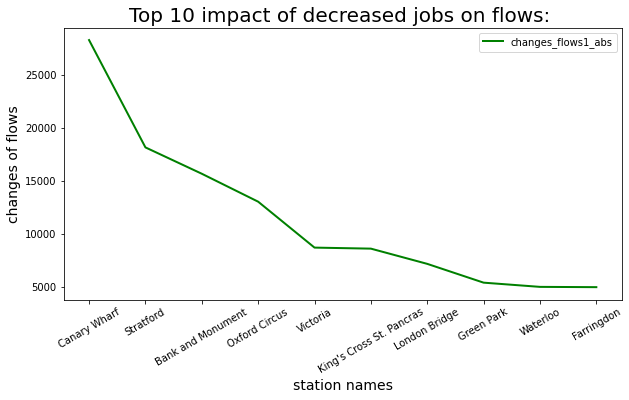

In [127]:
# plot the line chart
plt.figure(figsize=(10,5))
plt.title('Top 10 impact of decreased jobs on flows: ',fontsize=20)
plt.xlabel('station names',fontsize=14)
plt.ylabel('changes of flows',fontsize=14)
 
in1, = plt.plot(changes_job['station_destination'][0:10],changes_job['changes_flows1_abs'][0:10],color="green",linewidth=2)
plt.xticks(rotation=30)
plt.legend(handles = [in1,],labels=['changes_flows1_abs'],loc=1)
plt.show()

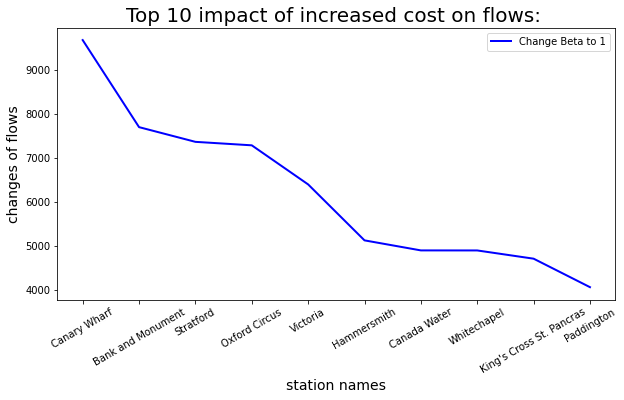

In [128]:
# plot the line chart
plt.figure(figsize=(10,5))
plt.title('Top 10 impact of increased cost on flows: ',fontsize=20)
plt.xlabel('station names',fontsize=14)
plt.ylabel('changes of flows',fontsize=14)
 
in1, = plt.plot(changes_cost1['station_destination'][0:10],changes_cost1['changes_flows2_abs'][0:10],color="blue",linewidth=2)
plt.xticks(rotation=30)
plt.legend(handles = [in1,],labels=['Change Beta to 1'],loc=1)
plt.show()

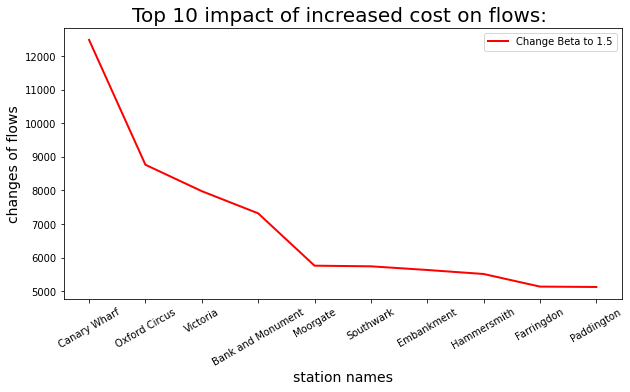

In [129]:
# plot the line chart
plt.figure(figsize=(10,5))
plt.title('Top 10 impact of increased cost on flows: ',fontsize=20)
plt.xlabel('station names',fontsize=14)
plt.ylabel('changes of flows',fontsize=14)
 
in1, = plt.plot(changes_cost2['station_destination'][0:10],changes_cost2['changes_flows3_abs'][0:10],color="red",linewidth=2)
plt.xticks(rotation=30)
plt.legend(handles = [in1,],labels=['Change Beta to 1.5'],loc=1)
plt.show()

In [130]:
changes_job_plot=changes_job
changes_job_plot=changes_job_plot.drop(['station_destination','flows', 'prodsimest2','changes_flows1'], axis=1)
changes_job_plot["rank"]= range(len(changes_job_plot))
changes_job_plot

,changes_flows1_abs,rank
54,28291.0,0
326,18165.0,1
15,15679.0,2
251,13043.0,3
355,8710.0,4
...,...,...
187,15.0,393
222,15.0,394
57,13.0,395
190,7.0,396


In [131]:
changes_cost1_plot=changes_cost1
changes_cost1_plot=changes_cost1_plot.drop(['station_destination','flows', 'prodsimest3','changes_flows2'], axis=1)
changes_cost1_plot["rank"]= range(len(changes_cost1_plot))
changes_cost1_plot

,changes_flows2_abs,rank
54,9677.0,0
15,7699.0,1
326,7365.0,2
251,7286.0,3
355,6398.0,4
...,...,...
36,3.0,393
22,3.0,394
102,3.0,395
136,1.0,396


In [132]:
changes_cost2_plot=changes_cost2
changes_cost2_plot=changes_cost2_plot.drop(['station_destination','flows', 'prodsimest4','changes_flows3'], axis=1)
changes_cost2_plot["rank"]= range(len(changes_cost2_plot))
changes_cost2_plot

,changes_flows3_abs,rank
54,12475.0,0
251,8763.0,1
355,7978.0,2
15,7319.0,3
227,5763.0,4
...,...,...
156,3.0,393
260,2.0,394
189,2.0,395
181,1.0,396


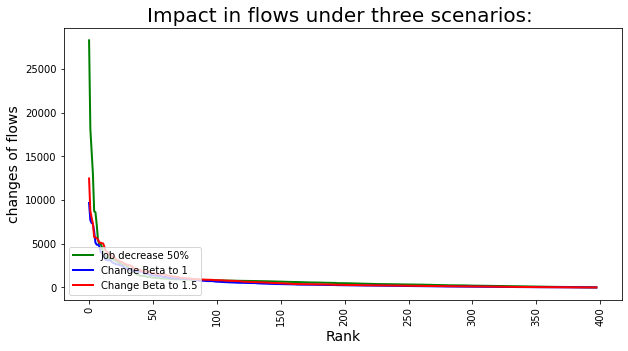

In [133]:
# plot the line chart
plt.figure(figsize=(10,5))
plt.title('Impact in flows under three scenarios: ',fontsize=20)
plt.xlabel('Rank',fontsize=14)
plt.ylabel('changes of flows',fontsize=14)
 
in1, = plt.plot(changes_job_plot['rank'],changes_job_plot['changes_flows1_abs'],color="green",linewidth=2)
in2, = plt.plot(changes_cost1_plot['rank'],changes_cost1_plot['changes_flows2_abs'],color="blue",linewidth=2)
in3, = plt.plot(changes_cost2_plot['rank'],changes_cost2_plot['changes_flows3_abs'],color="red",linewidth=2)

plt.xticks(rotation=90)
plt.legend(handles = [in1,in2,in3,],labels=['Job decrease 50%','Change Beta to 1','Change Beta to 1.5'],loc=3)
plt.show()

In [134]:
changes_job_plot1=changes_job_plot[0:10]
changes_cost1_plot1=changes_cost1_plot[0:10]
changes_cost2_plot1=changes_cost2_plot[0:10]

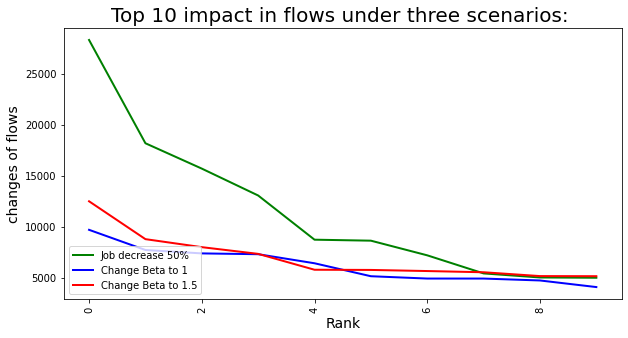

In [135]:
# plot the line chart
plt.figure(figsize=(10,5))
plt.title('Top 10 impact in flows under three scenarios: ',fontsize=20)
plt.xlabel('Rank',fontsize=14)
plt.ylabel('changes of flows',fontsize=14)
 
in1, = plt.plot(changes_job_plot1['rank'],changes_job_plot1['changes_flows1_abs'],color="green",linewidth=2)
in2, = plt.plot(changes_cost1_plot1['rank'],changes_cost1_plot1['changes_flows2_abs'],color="blue",linewidth=2)
in3, = plt.plot(changes_cost2_plot1['rank'],changes_cost2_plot1['changes_flows3_abs'],color="red",linewidth=2)

plt.xticks(rotation=90)
plt.legend(handles = [in1,in2,in3,],labels=['Job decrease 50%','Change Beta to 1','Change Beta to 1.5'],loc=3)
plt.show()

In [136]:
changes_job_plot2=np.mean(changes_job['changes_flows1_abs'])
changes_cost1_plot2=np.mean(changes_cost1['changes_flows2_abs'])
changes_cost2_plot2=np.mean(changes_cost2['changes_flows3_abs'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


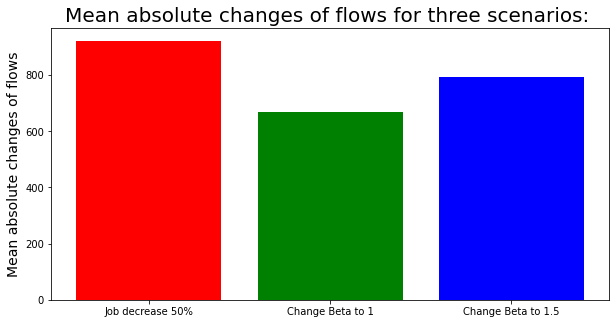

In [137]:
plt.figure(figsize=(10,5))
plt.title('Mean absolute changes of flows for three scenarios: ',fontsize=20)
plt.ylabel('Mean absolute changes of flows',fontsize=14)
num_list = [changes_job_plot2, changes_cost1_plot2, changes_cost2_plot2]
name_list = ['Job decrease 50%','Change Beta to 1','Change Beta to 1.5']
plt.bar(range(len(num_list)),num_list,color = "rgb",tick_label=name_list)
plt.show()